In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
import warnings # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir =r'C:\Users\kanis\Desktop\Python\Untitled Folder 2\train'
test_dir = r'C:\Users\kanis\Desktop\Python\Untitled Folder 2\test'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)


test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [4]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 200, 200, 3)
(32, 2)


In [5]:
# Check class names
class_names = train_data.class_indices
class_names = list(class_names.keys())
print(class_names)

['def_front', 'ok_front']


In [26]:
img =imread(train_dir + 'ok_front/cast_ok_0_1.jpeg')
img_4d = img[np.newaxis]
plt.figure(figsize=(25,10))
generators = {"rotation":ImageDataGenerator(rotation_range=180), 
              "zoom":ImageDataGenerator(zoom_range=0.7), 
              "brightness":ImageDataGenerator(brightness_range=[0.2,1.0]), 
              "height_shift":ImageDataGenerator(height_shift_range=0.7), 
              "width_shift":ImageDataGenerator(width_shift_range=0.7)}

plt.subplot(1, 6, 1)
plt.title("Original", weight='bold', size=15)
plt.imshow(img)
plt.axis('off')
cnt = 2
for param, generator in generators.items():
    image_gen = generator
    gen = image_gen.flow(img_4d, batch_size=1)
    batches = next(gen)
    g_img = batches[0].astype(np.uint8)
    plt.subplot(1, 6, cnt)
    plt.title(param, weight='bold', size=15)
    plt.imshow(g_img)
    plt.axis('off')
    cnt += 1
plt.show()

NameError: name 'imread' is not defined

In [6]:
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    
    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()

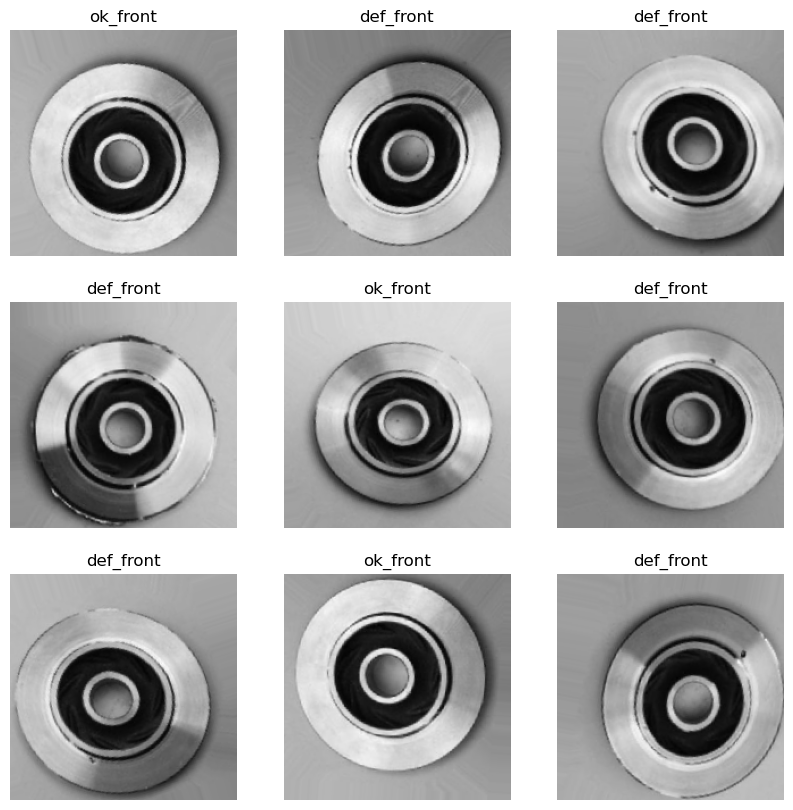

In [7]:
sample_images(train_data, nrows=3, ncols=3)

In [8]:
image_batch

array([[[[0.84198785, 0.84198785, 0.84198785],
         [0.8440363 , 0.8440363 , 0.8440363 ],
         [0.85391396, 0.85391396, 0.85391396],
         ...,
         [0.91219807, 0.91219807, 0.91219807],
         [0.9102318 , 0.9102318 , 0.9102318 ],
         [0.9082656 , 0.9082656 , 0.9082656 ]],

        [[0.8439541 , 0.8439541 , 0.8439541 ],
         [0.84207004, 0.84207004, 0.84207004],
         [0.85096467, 0.85096467, 0.85096467],
         ...,
         [0.9046054 , 0.9046054 , 0.9046054 ],
         [0.90263915, 0.90263915, 0.90263915],
         [0.9006729 , 0.9006729 , 0.9006729 ]],

        [[0.8459203 , 0.8459203 , 0.8459203 ],
         [0.8401038 , 0.8401038 , 0.8401038 ],
         [0.84801525, 0.84801525, 0.84801525],
         ...,
         [0.89906585, 0.89906585, 0.89906585],
         [0.9010321 , 0.9010321 , 0.9010321 ],
         [0.9029983 , 0.9029983 , 0.9029983 ]],

        ...,

        [[0.6724829 , 0.6724829 , 0.6724829 ],
         [0.6714998 , 0.6714998 , 0.6714998 ]

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define input layer
input_layer = Input(shape=(200, 200, 3))

# First convolutional block
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)

# Second convolutional block
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
pool2 = MaxPooling2D((2, 2))(conv4)

# Third convolutional block
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
pool3 = MaxPooling2D((2, 2))(conv6)

# Flatten layer
flatten = Flatten()(pool3)

# Fully connected layers
dense1 = Dense(256, activation='relu')(flatten)
dropout1 = Dropout(0.2)(dense1)
output_layer = Dense(2, activation='softmax')(dropout1)

# Define the VGG model
vgg_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model (using the same compile parameters as before)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
vgg_model.summary()

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define input layer
input_layer = Input(shape=(200, 200, 3))

# First convolutional block
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv2)

# Second convolutional block
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
pool2 = MaxPooling2D((2, 2))(conv4)

# Third convolutional block
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
pool3 = MaxPooling2D((2, 2))(conv6)

# Flatten layer
flatten = Flatten()(pool3)

# Fully connected layers
dense1 = Dense(256, activation='relu')(flatten)
dropout1 = Dropout(0.2)(dense1)
output_layer = Dense(2, activation='softmax')(dropout1)

# Define the VGG model
vgg_model = Model(inputs=input_layer, outputs=output_layer)






Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                          

In [10]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
vgg_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 64)      36928     
                                                           

In [24]:
model_save_path = 'casting_product_detection.hdf5'
early_stop = EarlyStopping(monitor='val_loss',patience=2)
checkpoint = ModelCheckpoint(filepath=model_save_path, verbose=1, save_best_only=True, monitor='val_loss')


NameError: name 'EarlyStopping' is not defined